This notebook provides the insight of Amazon Products reviews, analyze the sentiments of customer, summary of statistical data ,data visualization, fitting the dataset into *random forest* model to train our model which has the highest accuracy score of the dataset.

**About This Data:** This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

First grab some packages we need:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **Preparing data and some Visualization:**

In [0]:
alexdf = pd.read_csv("/content/gdrive/My Drive/Brainstation/data/amazon_alexa.tsv", sep = '\t')
alexdf.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [0]:
alexdf.shape

(3150, 5)

Check that if there is any null data in our dataset:

In [0]:
df_nulls = alexdf[alexdf.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()

,rating,date,variation,verified_reviews,feedback


Changing the rating values to a binary form. To do this, first we check that the ralation between rating and feedback data:

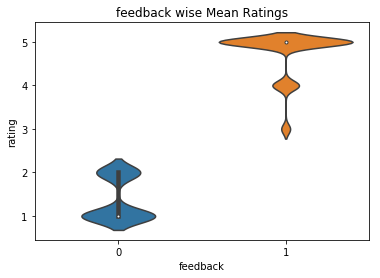

In [0]:
#plt.rcParams['figure.figsize'] = (12, 7)
#plt.style.use('fivethirtyeight')

sns.violinplot(alexdf['feedback'], alexdf['rating'])
plt.title("feedback wise Mean Ratings")
plt.show()

As you can see, the rating are above 3 stars, get the feeback 1. So we can change the rating more than 3 to 1 and the less than 3 to 0.

In [0]:
alexdf['rating'] = np.where(alexdf['rating'] >= 3, 1, 0)

In [0]:
alexdf.sample(10)

,rating,date,variation,verified_reviews,feedback
2238,1,30-Jul-18,Configuration: Fire TV Stick,Good,1
1634,1,29-Jul-18,Black Show,"I am pleased with the Echo Show, from the soun...",1
560,1,12-Jun-18,Black,I like my uncle. But sometime it goes a little...,1
2103,1,31-Jul-18,Configuration: Fire TV Stick,I don't know why I held out on getting this fo...,1
455,1,2-Jul-18,Black,This is great! Got one for my Gazebo and one u...,1
1449,1,30-Jul-18,Black Show,I love it. It does everything.,1
754,1,30-Jul-18,Charcoal Fabric,Love the echo I purchased it for company for m...,1
3015,1,30-Jul-18,White Dot,HANDY AS HELL 10/10 RECOMMEND,1
1055,1,30-Jul-18,Black Spot,I love this device! All the functionality of a...,1
598,0,6-Jun-18,White,I cant figure out how to use it.,0


Let's have some statistical analysis on our data:

In [0]:
alexdf.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,0.918413,0.918413
std,0.273778,0.273778
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [0]:
alexdf.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
0         257.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1        2893.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

Having statistical on 'rating' column demonstrate that most of the users are satisfied with alexa.

We can add a new column to our dataset to check the length of the reviews:

In [0]:
#Making a new column to detect how long the text messages are:
alexdf['length'] = alexdf['verified_reviews'].apply(len)
alexdf.head()

,rating,date,variation,verified_reviews,feedback,length
0,1,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,1,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,1,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,1,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,1,31-Jul-18,Charcoal Fabric,Music,1,5


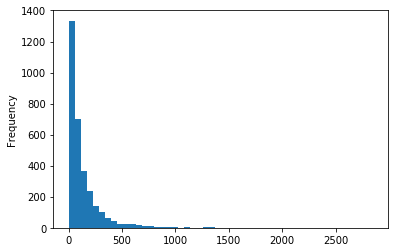

In [0]:
alexdf['length'].plot(bins=50, kind='hist');

The above Distribution Plot, shows a distribution of Length of the Reviews written by the people.This is to show on an average what is the length of the reviews written by the people for amazon alexa. Most of the Reviews are so short that is only One or Two words longer. We can see that most people write reviwes that is 5-20 words longer.

Very few people write longer reviews such as 70-80 words.

In [0]:
#Describing the data according to the length of reviews
alexdf.groupby('length').describe().sample(10)

rating                                ... feedback                              
        count mean  std  min  25%  50%  75%  ...     mean  std  min  25%  50%  75%  max
length                                       ...                                       
345       1.0  1.0  NaN  1.0  1.0  1.0  1.0  ...      1.0  NaN  1.0  1.0  1.0  1.0  1.0
191       3.0  1.0  0.0  1.0  1.0  1.0  1.0  ...      1.0  0.0  1.0  1.0  1.0  1.0  1.0
551       2.0  1.0  0.0  1.0  1.0  1.0  1.0  ...      1.0  0.0  1.0  1.0  1.0  1.0  1.0
493       1.0  1.0  NaN  1.0  1.0  1.0  1.0  ...      1.0  NaN  1.0  1.0  1.0  1.0  1.0
364       2.0  1.0  0.0  1.0  1.0  1.0  1.0  ...      1.0  0.0  1.0  1.0  1.0  1.0  1.0
467       2.0  1.0  0.0  1.0  1.0  1.0  1.0  ...      1.0  0.0  1.0  1.0  1.0  1.0  1.0
402       1.0  0.0  NaN  0.0  0.0  0.0  0.0  ...      0.0  NaN  0.0  0.0  0.0  0.0  0.0
570       2.0  1.0  0.0  1.0  1.0  1.0  1.0  ...      1.0  0.0  1.0  1.0  1.0  1.0  1.0
115       3.0  1.0  0.0  1.0  1.0  1.0  1.0  ...      1.0  0.0  1.0  1.0  1.0  1.0  1.0
248       2.0  1.0  0.0  1.0  1.0  1.0  1.0  ...      1.0  0.0  1.0  1.0  1.0  1.0  1.0

[10 rows x 16 columns]

To continue our visualization on the length of the reviews, in this part we are going to see if this factor is a distinguishing feature between high and low rate:

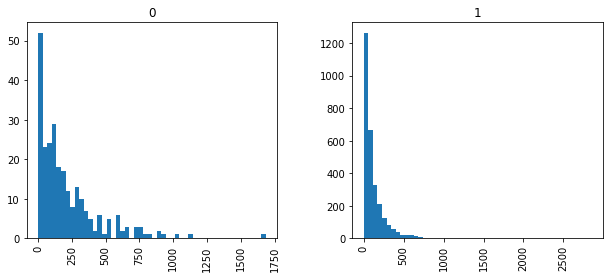

In [0]:
alexdf.hist(column='length', by='rating', bins=50,figsize=(10,4));

As the above charts show, people wrote longer sentences to express their unsatisfied expressions in compares with people who like Alexa. But both groups, tend to write short sentences.

Here again we are going to analyze the Pie Chart representing the Distribution of rating for Amazon Alexa which says that around 92% people gave more than 3 stars to Amazon Alexa and only 8% people gave less than 3 stars to Amazon Alexa. This Suggests that Amazon Alexa is a popular product amongst so many people.

In [0]:
import plotly.graph_objs as go
import plotly.offline as py

In [0]:
ratings = alexdf['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df, layout = layout)

py.iplot(fig)

This bar chart, plots the different Variatios of Amazon Alexa with their popularity. It is quite clear that Black Dot is the most popular variation of Amazon Alexa with more than 500 units out of 3150 samples, which is really good.

Charcoal Fabric and Configuration: Fire TV Stick are also good and very much popular after Black dot. Whereas Oak Fish and Walnut Finish are very Unpopular with less than 10 entries.

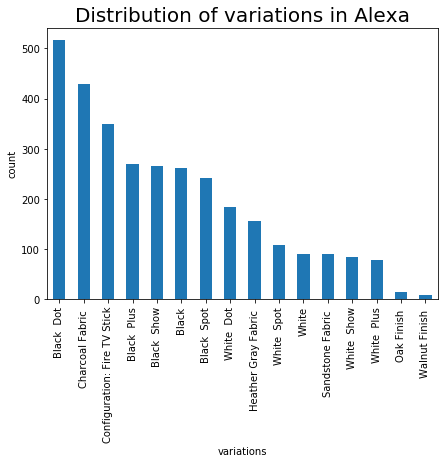

In [0]:
alexdf['variation'].value_counts().plot.bar(figsize = (7, 5))
plt.title('Distribution of variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

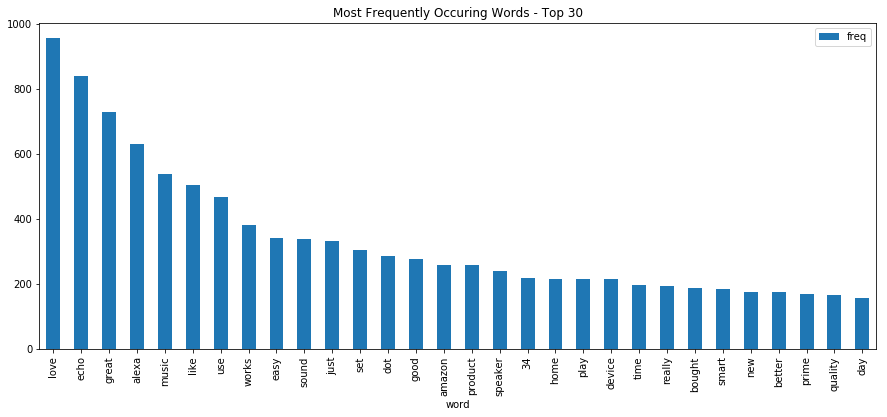

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(alexdf.verified_reviews) #learn a vocabulary
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 6))
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

The chart above shows the most frequent words in the reviews. We can get a idea about the reviews and what people think about the product.
to reaching out this result, we need to train our dataset to learn a vocabulary.


### **Machine Learning Part (Training, Testing and Modeling):**

In [0]:
import spacy
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

!python -m spacy download en_core_web_md

stopwords = stopwords.words('english')
punctuations = string.punctuation
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


Defining a function does cleaning our text and preparing for training:

In [0]:
import spacy
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

!python -m spacy download en_core_web_md

stopwords = stopwords.words('english')
punctuations = string.punctuation
nlp = spacy.load('en_core_web_sm')
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    table = str.maketrans({key: None for key in string.punctuation})

    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        ###Convert text to lowercase, strip whitespace and remove personal pronouns
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        ###Remove stopwords
        tokens = [tok.translate(table) for tok in tokens if tok not in stopwords ]
        tokens = ' '.join(tokens)
        #Remove extra whitespace
        tokens = ' '.join(tokens.split())
        texts.append(tokens)
    return pd.Series(texts)

Defining two variables (X, Y) which are our train and test variables. X that is a train variable, would be a text from '*verified_reviews*' and test variable (Y) would be the result of '*feedback*'.

In [0]:
X = cleanup_text(alexdf["verified_reviews"],logging=True)
Y = alexdf.iloc[:, 4].values

Processed 1000 out of 3150 documents.
Processed 2000 out of 3150 documents.
Processed 3000 out of 3150 documents.


**Bag of Words**
The following script uses the bag of words model to convert text documents into corresponding numerical features:



In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
X_train = vectorizer.fit_transform(X).toarray()

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X_train = tfidfconverter.fit_transform(X_train).toarray()

The above script convert values into TFIDF values.

This script divides data into 20% test set and 80% training set.

In [0]:
#training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2520, 925)
(2520,)
(630, 925)
(630,)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print("Training Accuracy :", classifier.score(x_train, y_train))
print("Testing Accuracy :", classifier.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy : 0.9876984126984127
Testing Accuracy : 0.9333333333333333
[[ 20  34]
 [  8 568]]


**Evaluating the Model:**

To evaluate the performance of a classification model we can use metrics such as the confusion matrix, F1 measure, and the accuracy.

To find these values, we can use classification_report, confusion_matrix, and accuracy_score utilities from the sklearn.metrics library.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print( '------------------------------', 'Confusion Matrix:', '\n', confusion_matrix(y_test,y_pred))
print('\n', '------------------------------', 'F1 measure:', '\n', '\n', classification_report(y_test,y_pred))
print('\n',  '------------------------------', 'Accuracy Score:', '\n', accuracy_score(y_test, y_pred))

------------------------------ Confusion Matrix: 
 [[ 20  34]
 [  8 568]]

 ------------------------------ F1 measure: 
 
               precision    recall  f1-score   support

           0       0.71      0.37      0.49        54
           1       0.94      0.99      0.96       576

    accuracy                           0.93       630
   macro avg       0.83      0.68      0.73       630
weighted avg       0.92      0.93      0.92       630


 ------------------------------ Accuracy Score: 
 0.9333333333333333
